# P&S Module 4: Conditional Probability and Bayes' Theorem

**Course:** Probability and Statistics

**Week 4:** Bayes Theorem and Applications

**Topics Covered:**
- Conditional Probability
- Bayes' Formula and Applications
- Independent Events
- Naive Bayes Classification

---

## Introduction

In Week 3, we learned basic probability where events occur in isolation. But in real life, events often influence each other. For example:
- What's the probability of rain **given that** it's cloudy?
- What's the probability a patient has a disease **given that** the test is positive?
- What's the probability an email is spam **given that** it contains certain words?

This is where **conditional probability** comes in - the probability of an event occurring given that another event has already occurred.

---

## Part A: Conditional Probability

### Definition

The **conditional probability** of event A given event B is:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

Read as: "Probability of A given B"

**Understanding the formula:**
- **Numerator P(A ∩ B)**: Probability that both A and B occur
- **Denominator P(B)**: Probability that B occurs
- We're restricting our sample space to only cases where B has occurred

### Problem 1: Drawing Cards Without Replacement

A deck has 52 cards. Two cards are drawn without replacement. What is the probability that the second card is a King, given that the first card was a King?

In [ ]:
# Problem 1: Conditional probability with cards

# Initial setup
total_cards = 52
kings = 4

# After drawing one King
remaining_cards = 51
remaining_kings = 3

# P(Second is King | First is King)
prob_second_king_given_first_king = remaining_kings / remaining_cards

print("Drawing cards WITHOUT replacement:")
print(f"Total cards initially: {total_cards}")
print(f"Kings initially: {kings}")
print(f"\nAfter drawing one King:")
print(f"  Remaining cards: {remaining_cards}")
print(f"  Remaining Kings: {remaining_kings}")
print(f"\nP(2nd King | 1st King) = {remaining_kings}/{remaining_cards} = {prob_second_king_given_first_king:.4f}")
print(f"As a percentage: {prob_second_king_given_first_king * 100:.2f}%")

Drawing cards WITHOUT replacement:
Total cards initially: 52
Kings initially: 4

After drawing one King:
  Remaining cards: 51
  Remaining Kings: 3

P(2nd King | 1st King) = 3/51 = 0.0588
As a percentage: 5.88%


### Understanding the Result

Notice that:
- **Without replacement**: P(2nd King | 1st King) = 3/51 ≈ 0.0588
- **With replacement**: P(2nd King | 1st King) = 4/52 ≈ 0.0769

The probability **changes** when we don't replace the first card because the sample space has been reduced.

### 📝 TO DO #1: Explore Different Scenarios

Try these modifications:

In [ ]:
# TO DO: Calculate these conditional probabilities

# Scenario 1: What if the first card was NOT a King?
remaining_after_non_king = 51
kings_remaining = 4
prob_king_given_non_king = kings_remaining / remaining_after_non_king

print("Scenario 1: First card was NOT a King")
print(f"P(2nd King | 1st NOT King) = {prob_king_given_non_king:.4f}\n")

# Scenario 2: Three cards drawn, first two are Kings
# What's P(3rd is King | first two are Kings)?
remaining_cards_3rd = 50
remaining_kings_3rd = 2
prob_3rd_king = remaining_kings_3rd / remaining_cards_3rd

print("Scenario 2: First two cards were Kings")
print(f"P(3rd King | first two Kings) = {prob_3rd_king:.4f}\n")

# TO DO: Try calculating:
# What if we draw from a deck with only 26 cards (half deck)?
# What if we're drawing Aces instead of Kings?

Scenario 1: First card was NOT a King
P(2nd King | 1st NOT King) = 0.0784

Scenario 2: First two cards were Kings
P(3rd King | first two Kings) = 0.0400



---

## Part B: Multiplication Rule

From the conditional probability formula, we can derive the **multiplication rule**:

$$P(A \cap B) = P(B) \times P(A|B)$$

Or equivalently:

$$P(A \cap B) = P(A) \times P(B|A)$$

This tells us how to find the probability that both events occur.

### Problem 2: Medical Testing

A disease affects 1% of the population. A test for this disease is 95% accurate (both for positive and negative results).

- P(Disease) = 0.01
- P(Positive Test | Disease) = 0.95
- P(Negative Test | No Disease) = 0.95

What is the probability that someone has the disease AND tests positive?

In [ ]:
# Problem 2: Medical testing - multiplication rule

# Given probabilities
p_disease = 0.01
p_positive_given_disease = 0.95
p_negative_given_no_disease = 0.95

# Using multiplication rule: P(Disease AND Positive) = P(Disease) × P(Positive | Disease)
p_disease_and_positive = p_disease * p_positive_given_disease

print("Medical Testing Scenario:")
print(f"P(Disease) = {p_disease}")
print(f"P(Positive Test | Disease) = {p_positive_given_disease}")
print(f"\nUsing Multiplication Rule:")
print(f"P(Disease AND Positive Test) = P(Disease) × P(Positive | Disease)")
print(f"                              = {p_disease} × {p_positive_given_disease}")
print(f"                              = {p_disease_and_positive:.4f}")
print(f"\nThis means {p_disease_and_positive * 100:.2f}% of the population has the disease AND tests positive.")

Medical Testing Scenario:
P(Disease) = 0.01
P(Positive Test | Disease) = 0.95

Using Multiplication Rule:
P(Disease AND Positive Test) = P(Disease) × P(Positive | Disease)
                              = 0.01 × 0.95
                              = 0.0095

This means 0.95% of the population has the disease AND tests positive.


### Visualizing with a Tree Diagram

Let's visualize this scenario with 10,000 people:

Out of 10,000 people:

Have Disease: 100
  - Test Positive: 95
  - Test Negative: 5

No Disease: 9,900
  - Test Positive: 495
  - Test Negative: 9,405


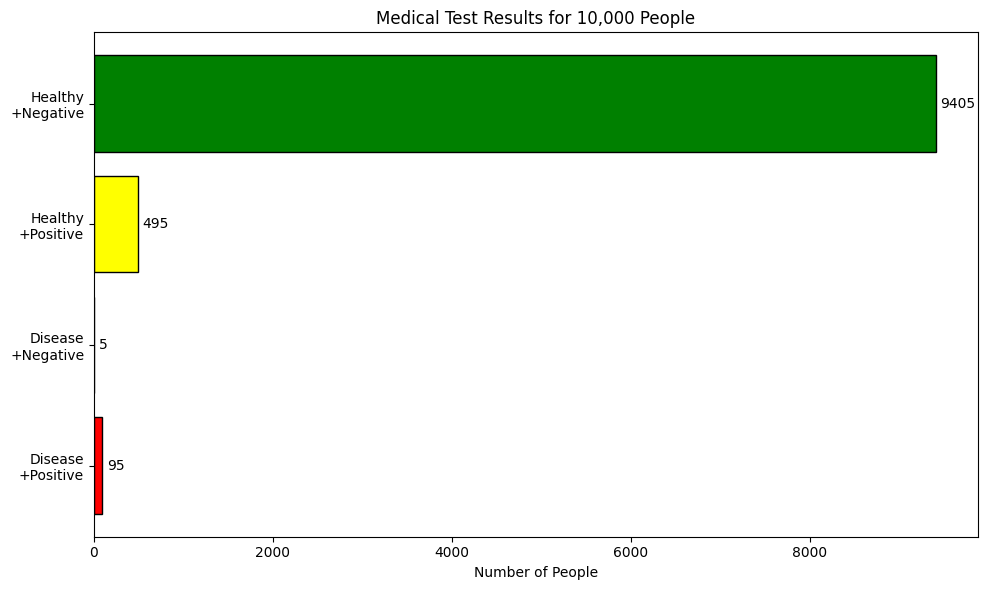

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Population breakdown
population = 10000

# First split: Disease vs No Disease
people_with_disease = int(population * p_disease)
people_without_disease = population - people_with_disease

# Second split: Test results
diseased_test_positive = int(people_with_disease * p_positive_given_disease)
diseased_test_negative = people_with_disease - diseased_test_positive

healthy_test_negative = int(people_without_disease * p_negative_given_no_disease)
healthy_test_positive = people_without_disease - healthy_test_negative

print(f"Out of {population:,} people:\n")
print(f"Have Disease: {people_with_disease}")
print(f"  - Test Positive: {diseased_test_positive}")
print(f"  - Test Negative: {diseased_test_negative}")
print(f"\nNo Disease: {people_without_disease:,}")
print(f"  - Test Positive: {healthy_test_positive}")
print(f"  - Test Negative: {healthy_test_negative:,}")

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))

# Create a simple tree structure visualization
categories = ['Disease\n+Positive', 'Disease\n+Negative',
              'Healthy\n+Positive', 'Healthy\n+Negative']
values = [diseased_test_positive, diseased_test_negative,
          healthy_test_positive, healthy_test_negative]
colors = ['red', 'orange', 'yellow', 'green']

bars = ax.barh(categories, values, color=colors, edgecolor='black')
ax.set_xlabel('Number of People')
ax.set_title(f'Medical Test Results for {population:,} People')

# Add value labels
for i, (bar, val) in enumerate(zip(bars, values)):
    ax.text(val + 50, i, f'{val}', va='center')

plt.tight_layout()
plt.show()

### 📝 TO DO #2: Calculate False Positive Rate

Looking at the data above, answer these questions:

In [ ]:
# TO DO: Calculate important probabilities

# 1. What's the total number of positive tests?
total_positive_tests = diseased_test_positive + healthy_test_positive
print(f"Total Positive Tests: {total_positive_tests}\n")

# 2. Of those who test positive, how many actually have the disease?
# This is P(Disease | Positive Test) - we'll learn this is Bayes' Theorem!
prob_disease_given_positive = diseased_test_positive / total_positive_tests
print(f"P(Disease | Positive Test) = {diseased_test_positive}/{total_positive_tests}")
print(f"                           = {prob_disease_given_positive:.4f}")
print(f"                           = {prob_disease_given_positive * 100:.1f}%")

print(f"\n⚠️ Surprising result! Even with a 95% accurate test,")
print(f"only {prob_disease_given_positive * 100:.1f}% of positive tests indicate actual disease!")
print(f"\nWhy? Because the disease is rare (only 1% of population).")

# TO DO: Try changing p_disease to 0.10 (10%) and see how this changes

Total Positive Tests: 590

P(Disease | Positive Test) = 95/590
                           = 0.1610
                           = 16.1%

⚠️ Surprising result! Even with a 95% accurate test,
only 16.1% of positive tests indicate actual disease!

Why? Because the disease is rare (only 1% of population).


---

## Part C: Bayes' Theorem

**Bayes' Theorem** allows us to "reverse" conditional probabilities. If we know P(B|A), we can find P(A|B).

### The Formula

$$P(A|B) = \frac{P(B|A) \times P(A)}{P(B)}$$

Or in expanded form:

$$P(A|B) = \frac{P(B|A) \times P(A)}{P(B|A) \times P(A) + P(B|A') \times P(A')}$$

Where:
- **P(A|B)** = Posterior probability (what we want to find)
- **P(B|A)** = Likelihood (what we know)
- **P(A)** = Prior probability (base rate)
- **P(B)** = Marginal probability (total probability of B)

### Problem 3: Spam Email Detection

An email filter knows:
- 30% of emails are spam: P(Spam) = 0.30
- 80% of spam emails contain the word "free": P("free" | Spam) = 0.80
- 10% of legitimate emails contain "free": P("free" | Not Spam) = 0.10

**Question:** If an email contains "free", what's the probability it's spam?

In [ ]:
# Problem 3: Bayes' Theorem - Spam Detection

# Given probabilities
p_spam = 0.30
p_not_spam = 1 - p_spam
p_free_given_spam = 0.80
p_free_given_not_spam = 0.10

# Step 1: Calculate P(free) using total probability
p_free = (p_free_given_spam * p_spam) + (p_free_given_not_spam * p_not_spam)

# Step 2: Apply Bayes' Theorem
p_spam_given_free = (p_free_given_spam * p_spam) / p_free

print("Spam Email Detection using Bayes' Theorem\n")
print("Given:")
print(f"  P(Spam) = {p_spam}")
print(f"  P('free' | Spam) = {p_free_given_spam}")
print(f"  P('free' | Not Spam) = {p_free_given_not_spam}")

print(f"\nStep 1: Calculate P('free'):")
print(f"  P('free') = P('free'|Spam)×P(Spam) + P('free'|Not Spam)×P(Not Spam)")
print(f"           = {p_free_given_spam}×{p_spam} + {p_free_given_not_spam}×{p_not_spam}")
print(f"           = {p_free:.4f}")

print(f"\nStep 2: Apply Bayes' Theorem:")
print(f"  P(Spam | 'free') = P('free'|Spam) × P(Spam) / P('free')")
print(f"                   = {p_free_given_spam} × {p_spam} / {p_free:.4f}")
print(f"                   = {p_spam_given_free:.4f}")
print(f"                   = {p_spam_given_free * 100:.1f}%")

print(f"\n✓ If an email contains 'free', there's a {p_spam_given_free * 100:.1f}% chance it's spam!")

Spam Email Detection using Bayes' Theorem

Given:
  P(Spam) = 0.3
  P('free' | Spam) = 0.8
  P('free' | Not Spam) = 0.1

Step 1: Calculate P('free'):
  P('free') = P('free'|Spam)×P(Spam) + P('free'|Not Spam)×P(Not Spam)
           = 0.8×0.3 + 0.1×0.7
           = 0.3100

Step 2: Apply Bayes' Theorem:
  P(Spam | 'free') = P('free'|Spam) × P(Spam) / P('free')
                   = 0.8 × 0.3 / 0.3100
                   = 0.7742
                   = 77.4%

✓ If an email contains 'free', there's a 77.4% chance it's spam!


### Visualizing Bayes' Theorem

Let's visualize how Bayes' Theorem works with 1000 emails:

Out of 1000 emails:

Spam (300):
  - Contains 'free': 240
  - No 'free': 60

Not Spam (700):
  - Contains 'free': 70
  - No 'free': 630


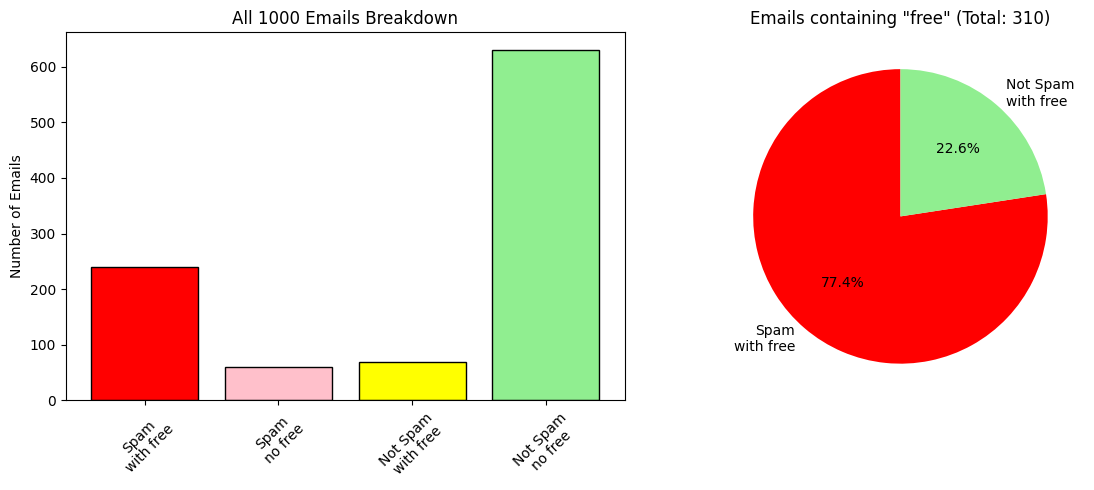


📊 Key Insight:
Of 310 emails with 'free', 240 are spam
Probability = 240/310 = 0.7742


In [ ]:
# Simulate 1000 emails
total_emails = 1000

# Spam emails
spam_emails = int(total_emails * p_spam)
spam_with_free = int(spam_emails * p_free_given_spam)
spam_without_free = spam_emails - spam_with_free

# Not spam emails
not_spam_emails = total_emails - spam_emails
not_spam_with_free = int(not_spam_emails * p_free_given_not_spam)
not_spam_without_free = not_spam_emails - not_spam_with_free

print(f"Out of {total_emails} emails:\n")
print(f"Spam ({spam_emails}):")
print(f"  - Contains 'free': {spam_with_free}")
print(f"  - No 'free': {spam_without_free}")
print(f"\nNot Spam ({not_spam_emails}):")
print(f"  - Contains 'free': {not_spam_with_free}")
print(f"  - No 'free': {not_spam_without_free}")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: All emails by category
categories1 = ['Spam\nwith free', 'Spam\nno free', 'Not Spam\nwith free', 'Not Spam\nno free']
values1 = [spam_with_free, spam_without_free, not_spam_with_free, not_spam_without_free]
colors1 = ['red', 'pink', 'yellow', 'lightgreen']
ax1.bar(categories1, values1, color=colors1, edgecolor='black')
ax1.set_ylabel('Number of Emails')
ax1.set_title('All 1000 Emails Breakdown')
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Focus on emails containing "free"
total_with_free = spam_with_free + not_spam_with_free
labels2 = ['Spam\nwith free', 'Not Spam\nwith free']
sizes2 = [spam_with_free, not_spam_with_free]
colors2 = ['red', 'lightgreen']
ax2.pie(sizes2, labels=labels2, colors=colors2, autopct='%1.1f%%', startangle=90)
ax2.set_title(f'Emails containing "free" (Total: {total_with_free})')

plt.tight_layout()
plt.show()

print(f"\n📊 Key Insight:")
print(f"Of {total_with_free} emails with 'free', {spam_with_free} are spam")
print(f"Probability = {spam_with_free}/{total_with_free} = {spam_with_free/total_with_free:.4f}")

### 📝 TO DO #3: Bayes' Theorem-Practice

Try modifying the spam detection scenario:

In [ ]:
# TO DO: Experiment with different scenarios

def bayes_spam_detection(p_spam, p_word_given_spam, p_word_given_not_spam, word="word"):
    """Calculate P(Spam | word appears) using Bayes' Theorem"""
    p_not_spam = 1 - p_spam
    p_word = (p_word_given_spam * p_spam) + (p_word_given_not_spam * p_not_spam)
    p_spam_given_word = (p_word_given_spam * p_spam) / p_word

    print(f"\nScenario: Email contains '{word}'")
    print(f"P(Spam) = {p_spam}")
    print(f"P('{word}' | Spam) = {p_word_given_spam}")
    print(f"P('{word}' | Not Spam) = {p_word_given_not_spam}")
    print(f"Result: P(Spam | '{word}') = {p_spam_given_word:.4f} ({p_spam_given_word*100:.1f}%)")
    return p_spam_given_word

# Original scenario
bayes_spam_detection(0.30, 0.80, 0.10, "free")

# TO DO: Try these scenarios by uncommenting:

# Scenario 1: More spam in inbox (50% instead of 30%)
# bayes_spam_detection(0.50, 0.80, 0.10, "free")

# Scenario 2: Word "winner" appears in 90% of spam, 5% of legitimate
# bayes_spam_detection(0.30, 0.90, 0.05, "winner")

# Scenario 3: Word "meeting" appears in 10% of spam, 40% of legitimate
# bayes_spam_detection(0.30, 0.10, 0.40, "meeting")

---

## Part D: Independent Events

Two events A and B are **independent** if the occurrence of one does NOT affect the occurrence of the other.

### Mathematical Definition

Events A and B are independent if:

$$P(A \cap B) = P(A) \times P(B)$$

Or equivalently:

$$P(A|B) = P(A)$$

**Examples of independent events:**
- Flipping a coin twice (first flip doesn't affect second)
- Rolling two dice (one die doesn't affect the other)
- Drawing cards WITH replacement

**Examples of dependent events:**
- Drawing cards WITHOUT replacement
- Weather today and weather tomorrow
- A person's height and weight

### Problem 4: Coin and Die

Event A: Flipping a coin and getting Heads

Event B: Rolling a die and getting a 6

Are these events independent?

In [ ]:
# Problem 4: Testing independence - Coin and Die

# Individual probabilities
p_heads = 0.5
p_six = 1/6

# If independent, P(Heads AND 6) should equal P(Heads) × P(6)
p_both_if_independent = p_heads * p_six

print("Testing Independence: Coin flip and die roll\n")
print(f"P(Heads) = {p_heads}")
print(f"P(Six) = {p_six:.4f}")
print(f"\nIf independent:")
print(f"P(Heads AND Six) = P(Heads) × P(Six)")
print(f"                 = {p_heads} × {p_six:.4f}")
print(f"                 = {p_both_if_independent:.4f}")

# Verify by simulation
import random

trials = 100000
both_occur = 0

for _ in range(trials):
    coin = random.choice(['H', 'T'])
    die = random.randint(1, 6)
    if coin == 'H' and die == 6:
        both_occur += 1

simulated_prob = both_occur / trials

print(f"\nSimulation Verification ({trials:,} trials):")
print(f"P(Heads AND Six) ≈ {simulated_prob:.4f}")
print(f"\n✓ The events are INDEPENDENT because the simulated probability")
print(f"  matches the theoretical probability from multiplication.")

### Problem 5: Drawing Cards - Comparing With and Without Replacement

Let's compare independent vs dependent events:

In [ ]:
# Problem 5: Cards - With vs Without Replacement

# Scenario A: WITH replacement (independent)
print("SCENARIO A: Drawing cards WITH replacement\n")
p_first_king = 4/52
p_second_king_with_replacement = 4/52  # Same! Deck is restored
p_both_kings_with = p_first_king * p_second_king_with_replacement

print(f"P(1st King) = {p_first_king:.4f}")
print(f"P(2nd King | 1st King) = {p_second_king_with_replacement:.4f}")
print(f"P(Both Kings) = {p_first_king:.4f} × {p_second_king_with_replacement:.4f} = {p_both_kings_with:.6f}")
print(f"\nThe events are INDEPENDENT\n")
print("-" * 50)

# Scenario B: WITHOUT replacement (dependent)
print("\nSCENARIO B: Drawing cards WITHOUT replacement\n")
p_first_king = 4/52
p_second_king_without_replacement = 3/51  # Different! One King removed
p_both_kings_without = p_first_king * p_second_king_without_replacement

print(f"P(1st King) = {p_first_king:.4f}")
print(f"P(2nd King | 1st King) = {p_second_king_without_replacement:.4f}")
print(f"P(Both Kings) = {p_first_king:.4f} × {p_second_king_without_replacement:.4f} = {p_both_kings_without:.6f}")
print(f"\nThe events are DEPENDENT")

# Comparison
print("\n" + "=" * 50)
print("COMPARISON:")
print(f"With replacement (independent):    {p_both_kings_with:.6f}")
print(f"Without replacement (dependent):   {p_both_kings_without:.6f}")
print(f"Difference: {abs(p_both_kings_with - p_both_kings_without):.6f}")

### 📝 TO DO #4: Test Your Understanding of Independence

Determine if these pairs of events are independent or dependent:

In [ ]:
# TO DO: For each scenario, determine if events are independent

print("Exercise: Identify Independent vs Dependent Events\n")

scenarios = [
    ("Rolling a die twice", "Independent",
     "Each roll doesn't affect the other"),

    ("Drawing 2 cards without replacement", "Dependent",
     "First draw affects the second"),

    ("Flipping a coin and checking the weather", "Independent",
     "Coin flip doesn't affect weather"),

    ("Student's study time and exam score", "Dependent",
     "Studying affects exam performance"),

    ("Two separate lottery drawings", "Independent",
     "One drawing doesn't affect the other"),
]

for i, (scenario, answer, reason) in enumerate(scenarios, 1):
    print(f"{i}. {scenario}")
    # TO DO: Before revealing, think about your answer!
    print(f"   Answer: {answer}")
    print(f"   Reason: {reason}\n")

# TO DO: Create your own scenarios and test if they're independent!

---

## Part E: Naive Bayes Classification

**Naive Bayes** is a machine learning algorithm based on Bayes' Theorem. It's called "naive" because it assumes all features are independent (which isn't always true, but it works well anyway!).

### Application: Text Classification

Let's build a simple spam detector using Naive Bayes.

### Problem 6: Multi-word Spam Detection

We have three words to check: "free", "winner", "meeting"

Given probabilities:
- P(Spam) = 0.30
- P("free" | Spam) = 0.80, P("free" | Not Spam) = 0.10
- P("winner" | Spam) = 0.70, P("winner" | Not Spam) = 0.05
- P("meeting" | Spam) = 0.20, P("meeting" | Not Spam) = 0.60

**Question:** If an email contains "free" and "winner", what's P(Spam)?

In [ ]:
# Problem 6: Naive Bayes with multiple words

# Given probabilities
p_spam = 0.30
p_not_spam = 0.70

# Word probabilities
words_given_spam = {
    'free': 0.80,
    'winner': 0.70,
    'meeting': 0.20
}

words_given_not_spam = {
    'free': 0.10,
    'winner': 0.05,
    'meeting': 0.60
}

def naive_bayes_classify(words_in_email, show_steps=True):
    """Classify email as spam or not spam using Naive Bayes"""

    # Calculate P(words | Spam) - multiply all word probabilities
    p_words_given_spam = p_spam
    for word in words_in_email:
        p_words_given_spam *= words_given_spam[word]

    # Calculate P(words | Not Spam)
    p_words_given_not_spam = p_not_spam
    for word in words_in_email:
        p_words_given_not_spam *= words_given_not_spam[word]

    # Total probability
    p_words = p_words_given_spam + p_words_given_not_spam

    # Apply Bayes' Theorem
    p_spam_given_words = p_words_given_spam / p_words
    p_not_spam_given_words = p_words_given_not_spam / p_words

    if show_steps:
        print(f"Email contains: {', '.join(words_in_email)}\n")
        print(f"P(words | Spam) × P(Spam) = {p_words_given_spam:.6f}")
        print(f"P(words | Not Spam) × P(Not Spam) = {p_words_given_not_spam:.6f}")
        print(f"\nP(Spam | words) = {p_spam_given_words:.4f} ({p_spam_given_words*100:.1f}%)")
        print(f"P(Not Spam | words) = {p_not_spam_given_words:.4f} ({p_not_spam_given_words*100:.1f}%)")
        print(f"\n{'🚫 SPAM' if p_spam_given_words > 0.5 else '✓ NOT SPAM'}")

    return p_spam_given_words

# Example 1: Email with "free" and "winner"
naive_bayes_classify(['free', 'winner'])

### Visualizing Naive Bayes Decision

Let's see how different word combinations affect spam classification:

In [ ]:
# Test multiple email scenarios
import pandas as pd

test_emails = [
    (['free'], 'Spam'),
    (['winner'], 'Spam'),
    (['meeting'], 'Not Spam'),
    (['free', 'winner'], 'Likely Spam'),
    (['free', 'meeting'], 'Uncertain'),
    (['winner', 'meeting'], 'Uncertain'),
    (['free', 'winner', 'meeting'], 'Mixed')
]

results = []
for words, expected in test_emails:
    prob_spam = naive_bayes_classify(words, show_steps=False)
    prob_not_spam = 1 - prob_spam
    classification = 'SPAM' if prob_spam > 0.5 else 'NOT SPAM'
    results.append({
        'Words': ' + '.join(words),
        'P(Spam)': f'{prob_spam:.4f}',
        'P(Not Spam)': f'{prob_not_spam:.4f}',
        'Classification': classification,
        'Expected': expected
    })

# Display results
df = pd.DataFrame(results)
print("\nNaive Bayes Classification Results:\n")
print(df.to_string(index=False))

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
emails = [r['Words'] for r in results]
spam_probs = [float(r['P(Spam)']) for r in results]
not_spam_probs = [float(r['P(Not Spam)']) for r in results]

x = range(len(emails))
width = 0.35

bars1 = ax.bar([i - width/2 for i in x], spam_probs, width, label='P(Spam)', color='red', alpha=0.7)
bars2 = ax.bar([i + width/2 for i in x], not_spam_probs, width, label='P(Not Spam)', color='green', alpha=0.7)

ax.set_ylabel('Probability')
ax.set_title('Naive Bayes Spam Classification by Word Combination')
ax.set_xticks(x)
ax.set_xticklabels(emails, rotation=45, ha='right')
ax.legend()
ax.axhline(y=0.5, color='black', linestyle='--', linewidth=1, label='Decision Boundary')
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

### 📝 TO DO #5: Build Your Own Spam Detector

Experiment with the Naive Bayes classifier:

In [ ]:
# TO DO: Add new words and test different email combinations

# Add new words to the dictionary
words_given_spam['urgent'] = 0.60
words_given_not_spam['urgent'] = 0.15

words_given_spam['hello'] = 0.30
words_given_not_spam['hello'] = 0.70

# Test new combinations
print("Testing custom email scenarios:\n")

# Scenario 1: Very spammy email
print("1. Email: 'free', 'winner', 'urgent'")
naive_bayes_classify(['free', 'winner', 'urgent'])

print("\n" + "="*50 + "\n")

# Scenario 2: Legitimate email
print("2. Email: 'meeting', 'hello'")
naive_bayes_classify(['meeting', 'hello'])

print("\n" + "="*50 + "\n")

# TO DO: Create your own test cases
# What words would make an email definitely spam?
# What words would make it definitely legitimate?

# Your tests here:

### 📝 TO DO #6: Real-World Applications

Brainstorm and discuss:

1. **Medical Diagnosis**: How could Bayes' Theorem help diagnose diseases?
   - Prior: Disease prevalence in population
   - Likelihood: Test accuracy
   - Posterior: Probability patient has disease given test result

2. **Weather Prediction**: Given cloudy skies, what's the probability of rain?
   - Prior: Historical rain frequency
   - Likelihood: Cloud patterns before rain
   - Posterior: Rain probability given current clouds

3. **Fraud Detection**: Is this credit card transaction fraudulent?
   - Prior: Fraud rate
   - Likelihood: Transaction patterns of fraud vs legitimate
   - Posterior: Fraud probability given transaction details

**Discussion Questions:**
- Why is the "prior probability" important?
- What happens if we have very rare events (low prior)?
- How does sample size affect our confidence?

---

## Summary

### Key Concepts Covered:

**1. Conditional Probability:**
- P(A|B) = P(A ∩ B) / P(B)
- Probability of A given that B has occurred
- Sample space restricted to cases where B is true

**2. Multiplication Rule:**
- P(A ∩ B) = P(A) × P(B|A) = P(B) × P(A|B)
- Used to find probability of both events occurring

**3. Bayes' Theorem:**
- P(A|B) = [P(B|A) × P(A)] / P(B)
- Allows us to "reverse" conditional probabilities
- Crucial for updating beliefs with new evidence

**4. Independent Events:**
- P(A ∩ B) = P(A) × P(B)
- P(A|B) = P(A)
- One event doesn't affect the other

**5. Naive Bayes Classification:**
- Machine learning algorithm based on Bayes' Theorem
- Assumes feature independence
- Effective for text classification, spam filtering

---

## Practice Problems

**Problem A:** Medical Testing
- 2% of population has a disease
- Test is 98% accurate for positive cases
- Test is 95% accurate for negative cases
- If someone tests positive, what's P(Disease)?

**Problem B:** Drawing Balls
- Bag has 5 red and 3 blue balls
- Draw 2 without replacement
- Find: P(2nd red | 1st red)

**Problem C:** Email Classification
- 40% of emails are spam
- "discount" appears in 85% of spam, 15% of legitimate emails
- If email has "discount", is it spam?

**Problem D:** Independence Test
- Are "drawing a spade" and "drawing a king" independent events when drawing from a standard deck?

**Problem E:** Multiple Events
- Roll two dice
- Event A: First die shows 6
- Event B: Sum is 8
- Are A and B independent?

---

## Important Formulas to Remember

```
Conditional Probability:
P(A|B) = P(A ∩ B) / P(B)

Multiplication Rule:
P(A ∩ B) = P(A) × P(B|A)

Bayes' Theorem:
P(A|B) = [P(B|A) × P(A)] / P(B)

Bayes' Theorem (Expanded):
P(A|B) = [P(B|A) × P(A)] / [P(B|A) × P(A) + P(B|A') × P(A')]

Independence:
P(A ∩ B) = P(A) × P(B)
P(A|B) = P(A)

Total Probability:
P(B) = P(B|A) × P(A) + P(B|A') × P(A')
```

---